### EXERCICIO 1

![exercicio](<Exercicio 1.png>)

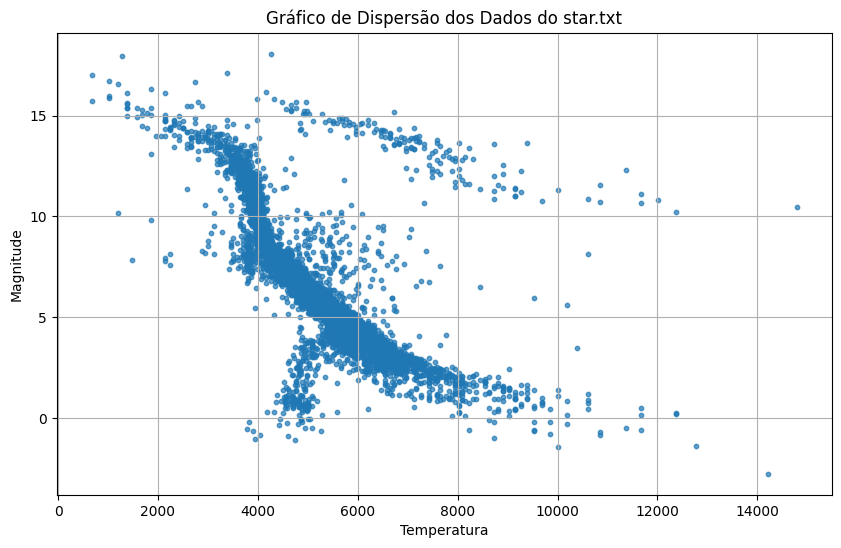

In [1]:
import matplotlib.pyplot as plt

# Carregar os dados do arquivo
x = []
y = []

with open("star.txt", "r") as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 2:
            try:
                x_val = float(parts[0])
                y_val = float(parts[1])
                x.append(x_val)
                y.append(y_val)
            except ValueError:
                continue  # Ignorar linhas com valores inválidos

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=10, alpha=0.7)
plt.title("Gráfico de Dispersão dos Dados do star.txt")
plt.xlabel("Temperatura")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


### EXERCICIO 2

![exercicio 2](<exexrcico 2.png>)

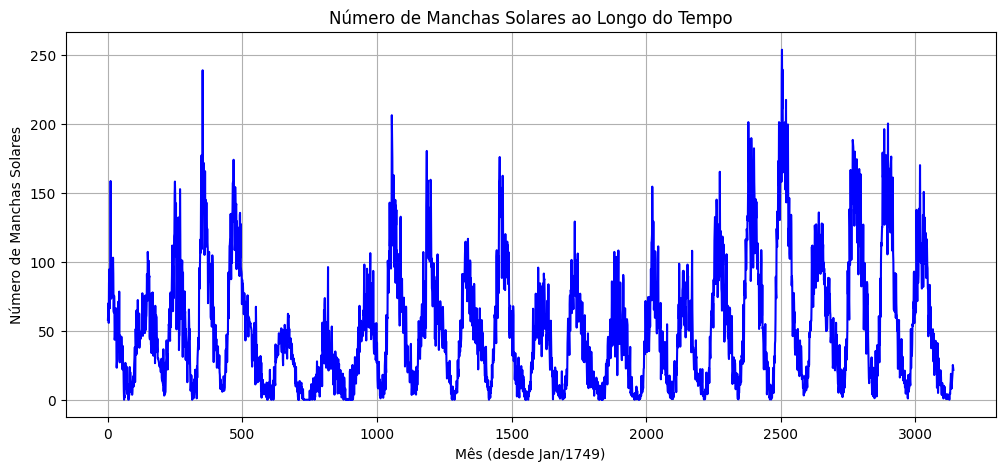

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parte (a)
# Carrega os dados do arquivo: primeira coluna = mês, segunda = manchas solares
dados = np.loadtxt("sunspots.txt")
meses = dados[:, 0]
manchas = dados[:, 1]

# Plotando o gráfico completo
plt.figure(figsize=(12, 5))
plt.plot(meses, manchas, color='blue')
plt.title("Número de Manchas Solares ao Longo do Tempo")
plt.xlabel("Mês (desde Jan/1749)")
plt.ylabel("Número de Manchas Solares")
plt.grid(True)
plt.show()


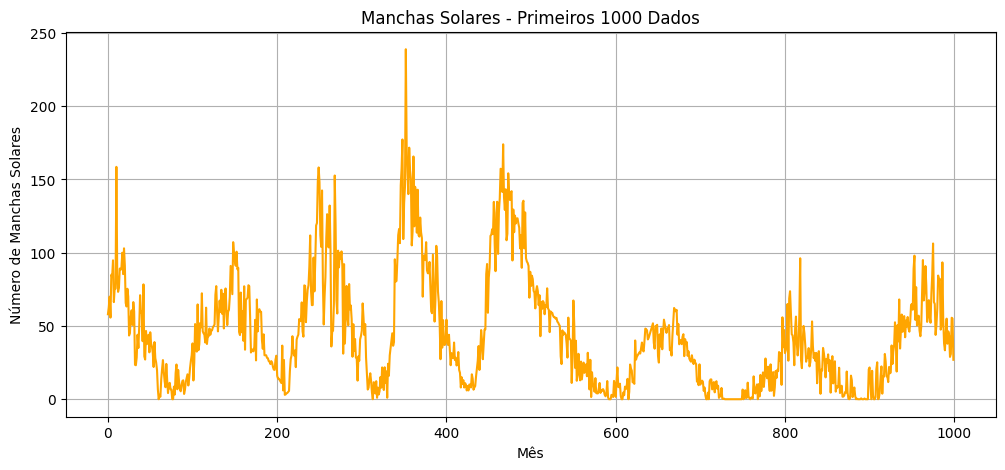

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parte (b)
dados = np.loadtxt("sunspots.txt")
meses = dados[:, 0]
manchas = dados[:, 1]

# Selecionar apenas os primeiros 1000 pontos
meses_1000 = meses[:1000]
manchas_1000 = manchas[:1000]

# Plotando gráfico dos primeiros 1000 pontos
plt.figure(figsize=(12, 5))
plt.plot(meses_1000, manchas_1000, color='orange')
plt.title("Manchas Solares - Primeiros 1000 Dados")
plt.xlabel("Mês")
plt.ylabel("Número de Manchas Solares")
plt.grid(True)
plt.show()


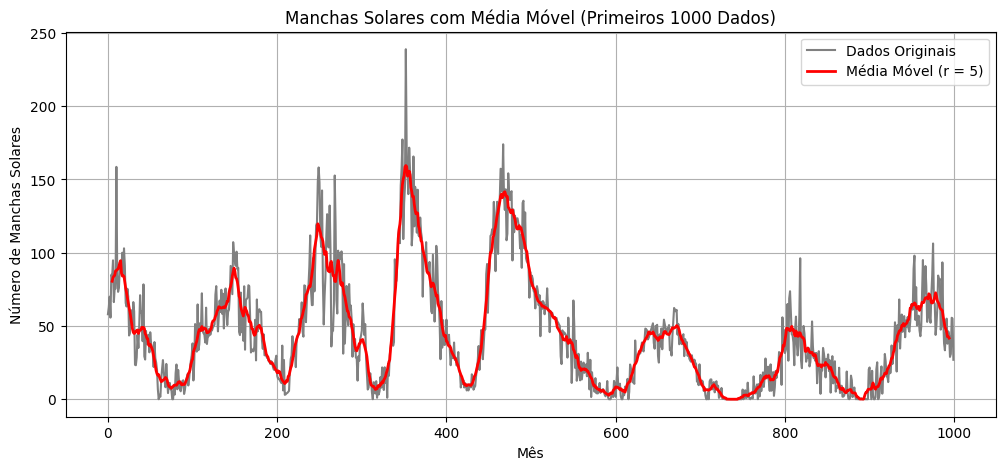

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parte (c)
dados = np.loadtxt("sunspots.txt")
meses = dados[:, 0]
manchas = dados[:, 1]

# Usar os primeiros 1000 pontos
meses_1000 = meses[:1000]
manchas_1000 = manchas[:1000]

# Parâmetro da média móvel
r = 5
media_movel = []

# Calcular a média móvel para os pontos onde a janela está completa
for k in range(len(manchas_1000)):
    if k >= r and k <= len(manchas_1000) - r - 1:
        media = np.mean(manchas_1000[k - r:k + r + 1])
    else:
        media = np.nan  # Para manter o tamanho do vetor, usar NaN nas bordas
    media_movel.append(media)

# Converter para array para facilitar plotagem
media_movel = np.array(media_movel)

# Plotar dados originais + média móvel
plt.figure(figsize=(12, 5))
plt.plot(meses_1000, manchas_1000, label='Dados Originais', color='gray')
plt.plot(meses_1000, media_movel, label='Média Móvel (r = 5)', color='red', linewidth=2)
plt.title("Manchas Solares com Média Móvel (Primeiros 1000 Dados)")
plt.xlabel("Mês")
plt.ylabel("Número de Manchas Solares")
plt.legend()
plt.grid(True)
plt.show()


Na parte (a), o objetivo é ler esse arquivo e plotar um gráfico completo mostrando a variação do número de manchas solares ao longo do tempo. Isso nos permite visualizar os ciclos solares e padrões de atividade solar ao longo de centenas de anos.

Na parte (b), restringimos o gráfico aos primeiros 1000 dados para permitir uma análise mais clara do comportamento inicial da série. Essa etapa é importante quando queremos investigar mais de perto uma parte específica da série temporal sem a distração do conjunto completo.

Na parte (c), implementamos uma média móvel centrada com raio r=5 (ou seja, uma janela de 11 meses) para suavizar os dados. A média móvel é calculada considerando os valores anteriores e posteriores ao ponto atual, resultando em uma curva suavizada que ajuda a identificar tendências e padrões mais facilmente. O gráfico final exibe tanto os dados originais quanto essa curva suavizada, ambos plotados nos primeiros 1000 pontos da série.

![alt text]({F3E75166-28D0-4E3D-AF26-AA0804A04468}.png)

### Expectativa de Vida

#### Organizando Os Dados

In [6]:
import pandas as pd

# Carregando os dados
df = pd.read_csv("expectativade_de_vida.csv")

# Visualizando colunas principais
print(df.columns)

# Mantendo só o que interessa
df_limpo = df[["REF_AREA_NAME", "TIME_PERIOD", "OBS_VALUE", "INDICATOR_NAME"]].copy()

# Corrigindo nomes e tipos
df_limpo.columns = ["País", "Ano", "Valor", "Indicador"]
df_limpo["Ano"] = df_limpo["Ano"].astype(int)
df_limpo["Valor"] = pd.to_numeric(df_limpo["Valor"], errors="coerce")

# Verificação de valores ausentes
df_limpo.dropna(subset=["Valor"], inplace=True)



Index(['STRUCTURE', 'STRUCTURE_ID', 'ACTION', 'FREQ_ID', 'FREQ_NAME',
       'REF_AREA_ID', 'REF_AREA_NAME', 'INDICATOR_ID', 'INDICATOR_NAME',
       'SEX_ID', 'SEX_NAME', 'AGE_ID', 'AGE_NAME', 'URBANISATION_ID',
       'URBANISATION_NAME', 'UNIT_MEASURE_ID', 'UNIT_MEASURE_NAME',
       'COMP_BREAKDOWN_1_ID', 'COMP_BREAKDOWN_1_NAME', 'COMP_BREAKDOWN_2_ID',
       'COMP_BREAKDOWN_2_NAME', 'COMP_BREAKDOWN_3_ID', 'COMP_BREAKDOWN_3_NAME',
       'TIME_PERIOD', 'OBS_VALUE', 'AGG_METHOD_ID', 'AGG_METHOD_NAME',
       'DECIMALS_ID', 'DECIMALS_NAME', 'DATABASE_ID_ID', 'DATABASE_ID_NAME',
       'COMMENT_TS', 'UNIT_MULT_ID', 'UNIT_MULT_NAME', 'DATA_SOURCE_ID',
       'DATA_SOURCE_NAME', 'UNIT_TYPE_ID', 'UNIT_TYPE_NAME', 'TIME_FORMAT_ID',
       'TIME_FORMAT_NAME', 'COMMENT_OBS', 'OBS_STATUS_ID', 'OBS_STATUS_NAME',
       'OBS_CONF_ID', 'OBS_CONF_NAME'],
      dtype='object')


#### linha temporal

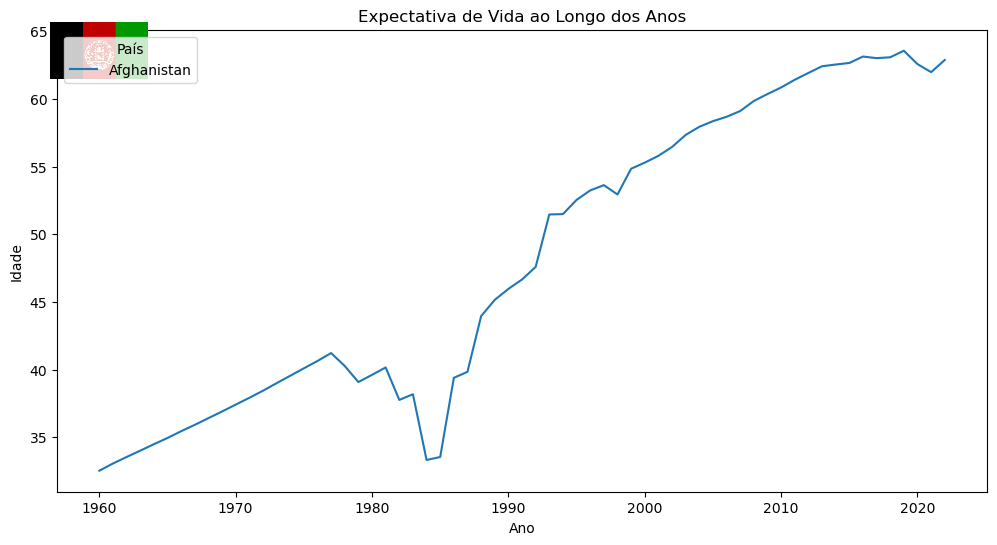

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Filtrando o país
pais_exemplo = ["Afghanistan"]
df_plot = df_limpo[df_limpo["País"].isin(pais_exemplo)]

# Criando o gráfico
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=df_plot, x="Ano", y="Valor", hue="País")
plt.title("Expectativa de Vida ao Longo dos Anos")
plt.ylabel("Idade")

# Adicionando a bandeira
img = mpimg.imread("Bandeira.png")
imagebox = OffsetImage(img, zoom=0.1)  # ajuste o zoom conforme o tamanho da imagem
# Posição no gráfico: (ano, valor)
ab = AnnotationBbox(imagebox, (df_plot["Ano"].min(), df_plot["Valor"].max()), frameon=False)
ax.add_artist(ab)

plt.show()


#### Regressão

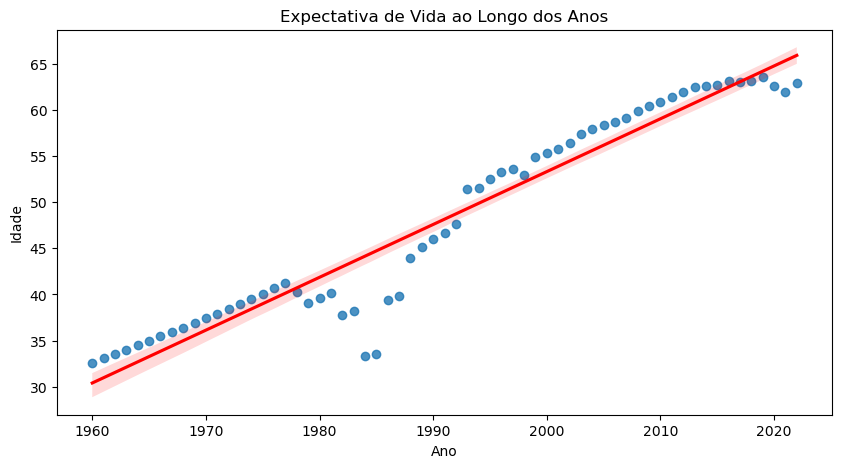

In [15]:
from scipy.stats import linregress

pais = "Afghanistan"
df_brasil = df_limpo[df_limpo["País"] == pais]

plt.figure(figsize=(10, 5))
sns.regplot(data=df_brasil, x="Ano", y="Valor", scatter=True, line_kws={"color": "red"})
plt.title("Expectativa de Vida ao Longo dos Anos")
plt.ylabel("Idade")
plt.show()


#### Heatmap da variação por década

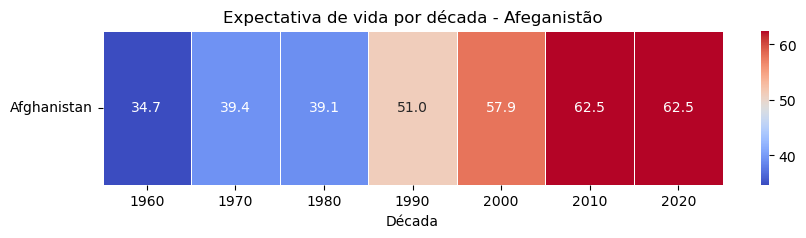

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular média da expectativa de vida por década
df_afg["Década"] = (df_afg["Ano"] // 10) * 10
media_por_decada = df_afg.groupby("Década")["Valor"].mean().reset_index()

# Transformar em DataFrame de uma linha (para heatmap)
media_por_decada["País"] = "Afghanistan"
heatmap_df = media_por_decada.pivot(index="País", columns="Década", values="Valor")

# Plotar heatmap
plt.figure(figsize=(10, 2))
sns.heatmap(heatmap_df, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Expectativa de vida por década - Afeganistão")
plt.xlabel("Década")
plt.ylabel("")
plt.yticks(rotation=0)
plt.show()
